In [1]:
import pandas as pd

df = pd.read_csv('/Users/dhruvbharara/Downloads/coldstorageupdated.csv')



In [2]:
df['capacity'].describe

<bound method NDFrame.describe of 0        100
1         99
2         15
3         99
4         60
        ... 
15772    NaN
15773    NaN
15774    NaN
15775    NaN
15776    NaN
Name: capacity, Length: 15777, dtype: object>

In [3]:
df['capacity'].unique()

array(['100', '99', '15', ..., '6092', '4183', '10333'], dtype=object)

In [4]:
df['capacity'] = pd.to_numeric(df['capacity'],errors='coerce').fillna(0) #converts the object type in capacity into float and the rest with NaN empty values to 0

In [5]:
df['capacity'].describe()


count     15777.000000
mean       3558.047583
std       14835.614445
min           0.000000
25%         148.882000
50%         760.000000
75%        4769.000000
max      897000.000000
Name: capacity, dtype: float64

In [6]:
def check_empty_null(x):
    count_null = df[x].isnull().sum()
    empty_count = (df[x].str.strip() == '').sum()
    total_missing_values = count_null+empty_count
    return total_missing_values




In [7]:
check_empty_null('Manager Name') #checking the null values in manager name column


11821

In [8]:
check_empty_null('Storage name')#checking the null values in storage name column


90

In [9]:
check_empty_null('Address') #checking the null values in address columns

1616

In [10]:
hcap = df['capacity'].idxmax()
dhcap = df.loc[hcap]
lcap = df['capacity'].idxmin()


In [11]:
print(f"details of cold storage with highest capacity : {dhcap}")

details of cold storage with highest capacity : Unnamed: 0               14504
STATE            Uttar Pradesh
DISTRICT              Pilibhit
Storage name          BISALPUR
Address                    NaN
Manager Name    SRI. PK BAJPAI
capacity              897000.0
Longitude                  NaN
Latitude                   NaN
Name: 14504, dtype: object


In [12]:
state_list = df['STATE'].unique()

In [13]:
capacity_per_state = {'State Name': [],'capacity':[]} #finding maximum capacities of states

def maxcap_state(state):
    state_name = df[df['STATE'] == state]
    capacity = state_name['capacity'].sum()
    capacity_per_state['State Name'].append(state)
    capacity_per_state['capacity'].append(capacity) 

for state in state_list:
    maxcap_state(state)
print(capacity_per_state)



{'State Name': ['Andaman And Nicobar Islands', 'Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Daman And Diu', 'Delhi', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], 'capacity': [1471.0, 5058405.665999999, 131564.0, 2923914.82, 30.0, 1367979.0, 500.0, 93964.0, 1655345.0, 3146072.41, 74146.0, 59742.0, 66381.0, 1976189.0, 337096.0, 1457075.0, 3346420.7098000003, 0.0, 13000.0, 979643.206, 4562066.177999999, 1871332.4232, 70657.0, 1124501.0, 1793162.126, 24833.0, 22653994.3805, 22975.604, 1322856.2]}


In [14]:
max_index = capacity_per_state['capacity'].index(max(capacity_per_state['capacity']))
max_state = capacity_per_state['State Name'][max_index]
max_capacity = capacity_per_state['capacity'][max_index]

print(f"The state with the maximum capacity is {max_state} with a capacity of {max_capacity}.")
#uttar pradesh is the state with the highest capacity

The state with the maximum capacity is Uttar Pradesh with a capacity of 22653994.3805.


In [15]:
storage_state = df['STATE'].value_counts()
print(storage_state) #karnataka has the highest number of cold storages

STATE
Karnataka                      3037
Uttar Pradesh                  2557
Maharashtra                    2330
Punjab                         1653
Andhra Pradesh                 1135
Rajasthan                       962
West Bengal                     947
Haryana                         473
Bihar                           424
Gujarat                         348
Odisha                          337
Telangana                       324
Madhya Pradesh                  315
Tamil Nadu                      251
Chhattisgarh                    247
Assam                           181
Kerala                          134
Himachal Pradesh                 37
Jammu And Kashmir                23
Jharkhand                        15
Uttarakhand                      14
Delhi                            10
Andaman And Nicobar Islands       7
Sikkim                            6
Tripura                           3
Mizoram                           2
Nagaland                          2
Daman And Diu         

In [16]:
storage_district = df['DISTRICT'].value_counts()
print(storage_district)

DISTRICT
Raichur       1307
Koppal         469
Agra           457
Ballari        453
Guntur         404
              ... 
Chitrakoot       1
Sonitpur         1
Sivasagar        1
Malappuram       1
Mewat            1
Name: count, Length: 422, dtype: int64


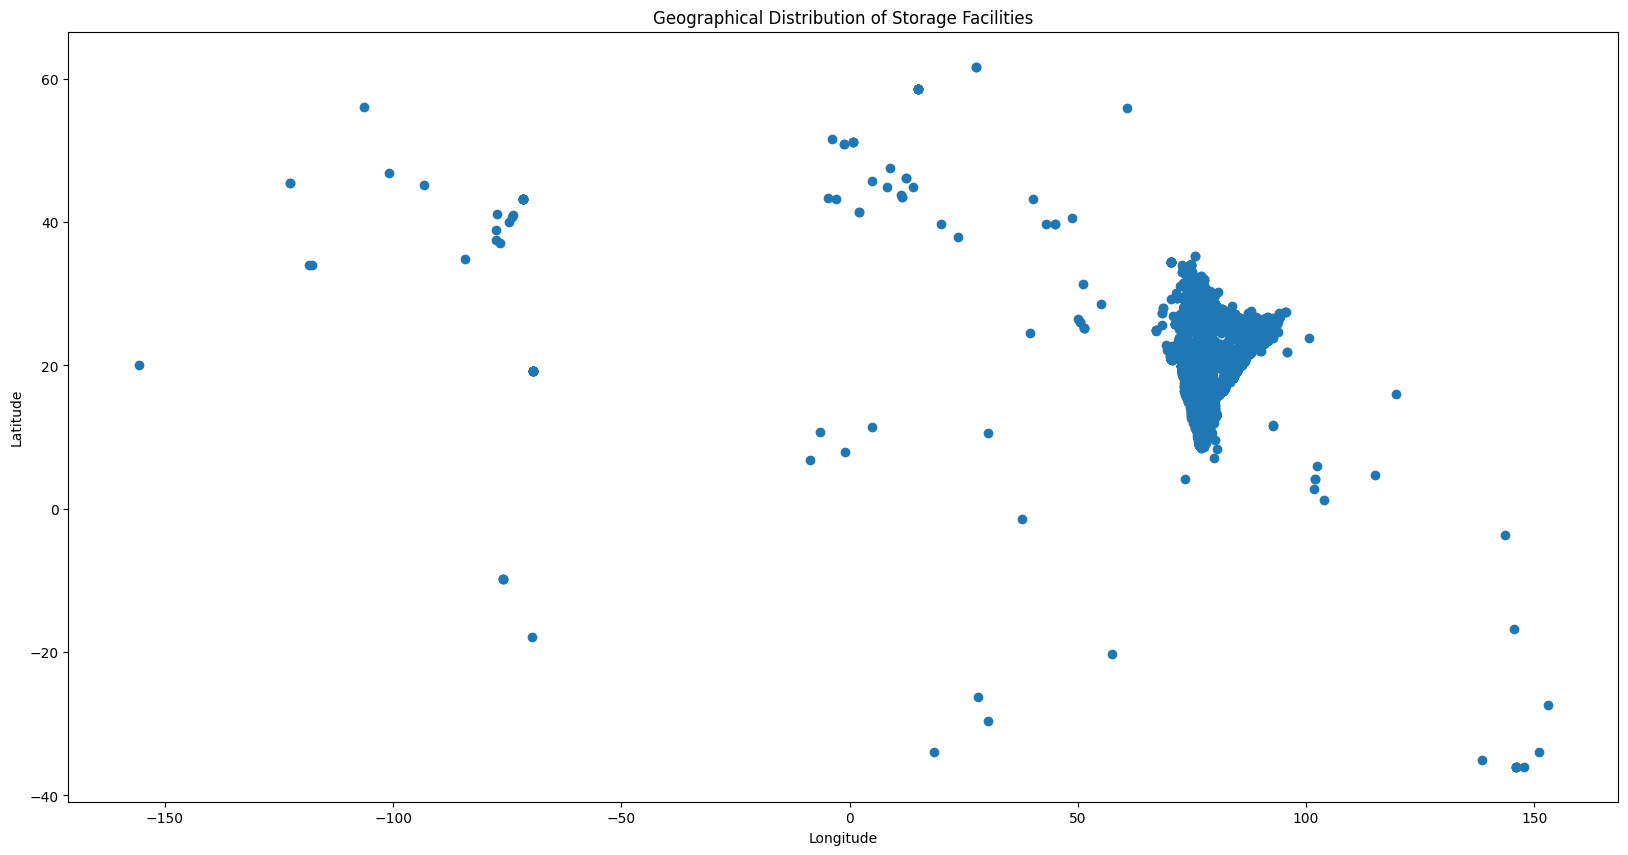

'this shows that the some of the latitudes and longitudes are not calculated properly but we\n ...can get the gist that the map of india is plotted'

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(df['Longitude'], df['Latitude'], alpha=1)
plt.title('Geographical Distribution of Storage Facilities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

'''this shows that the some of the latitudes and longitudes are not calculated properly but we
 ...can get the gist that the map of india is plotted'''

FROM THE ABOVE ANALYSIS WE FOUND THAT RAICHUR DISTRICT OF KARNATAKA HAS THE HIGHEST NUMBER OF COLD STORAGES...

In [18]:
ktk = df[df['STATE'] == 'Karnataka']

In [19]:
ktk['capacity'].sum() #the total capacity of karnataka

1976189.0

In [22]:
file = pd.DataFrame.to_csv(ktk , 'karnatakcoldstorage.csv') #extracting the details of storages in karnataka in another csv file